In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [635]:
#Read the file of Brent
Brent_prices=pd.read_csv('Brent_prices.csv', skiprows = 4)
#change time from string into datetime
Brent_prices['year'] = pd.to_datetime(Brent_prices['Month'])
#Adding column of the year so not sorted monthly
Brent_prices['year'] = Brent_prices['year'].dt.year
#Changine name of column 
Brent_prices = Brent_prices.rename(columns={'Europe Brent Spot Price FOB Dollars per Barrel':'Avg Brent Price'})
#Getting a new dataframe with average price per year
Avg_Brent = Brent_prices[(Brent_prices.year>1990) & (Brent_prices.year<2020)].groupby(['year'])['Avg Brent Price'].mean()
#use resetindex to get head names for each coumn again
Avg_Brent = Avg_Brent.reset_index(drop = False)

#Next Step

#Read the file of WTI
WTI_prices = pd.read_csv('WTI_prices.csv',skiprows=4)
WTI_prices = WTI_prices.rename(columns = {'Cushing OK WTI Spot Price FOB Dollars per Barrel':'Avg WTI Price'})
WTI_prices['year'] = (pd.to_datetime(WTI_prices['Month'])).dt.year
Avg_WTI = WTI_prices[(WTI_prices.year > 1990) & (WTI_prices.year <2020)].groupby(['year'])['Avg WTI Price'].mean()
Avg_WTI = Avg_WTI.reset_index()

#Merge both datasets into one dataframe
Avg_Oil_prices = pd.merge(Avg_Brent,Avg_WTI,on='year')
#change the type of year column into string so i can merge it with other data in unemployment data
Avg_Oil_prices['year'] = Avg_Oil_prices['year'].astype(str)
#transposed it so i can merge it with other data
Avg_Oil_prices; #= Avg_Oil_prices.transpose();


In [898]:
#working with unemployment rate file
Unemployment_rate = pd.read_csv('Unemployment_rate.csv', skiprows=3)
#Unemployment_rate.columns which will give us the list of all column names
Unemployment_rate = Unemployment_rate[['Country Name', 'Country Code','1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
History = ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019']


#Next step import the regions file


Regions = pd.read_csv('Regions_countries.csv')
Regions.columns
Regions = Regions[['TableName','Region', 'IncomeGroup']]
Regions = Regions.rename(columns = {'TableName':"Country Name"})


#Next Step of merging data


#Merge both data based on countryname
Countries = pd.merge(Regions,Unemployment_rate,on='Country Name',how='inner')
#groupby Regons and subsidiary of it is the countries which will show the average values for each
#country alone which will not change her
#If i grouped by Region only i will get the average values
Countries_grouped_regionally = Countries.groupby(['Region','Country Name'])[['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean()
Unemployment_regionally = Countries.groupby(['Region'])[['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean()
Unemployment_regionally = Unemployment_regionally.transpose()
Unemployment_regionally['year'] = History
Data_Region = pd.merge(Avg_Oil_prices,Unemployment_regionally,left_on='year',right_on='year')


#groupby total income
Countries_grouped_financially = Countries.groupby(['IncomeGroup','Country Name'])[['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean()
Unemployment_financially = Countries.groupby(['IncomeGroup'])[['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean()
Unemployment_financially = Unemployment_financially.transpose()
Unemployment_financially['year'] = History
Data_Income = pd.merge(Avg_Oil_prices,Unemployment_financially,left_on='year',right_on='year')


#groupby effectively by region and income
Unemployment_grouped_regionally_financially = Countries.groupby(['Region','IncomeGroup'])[['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean()
Unemployment_grouped_regionally_financially = (Unemployment_grouped_regionally_financially).transpose()
#Add a year column so you can match data on it
Unemployment_grouped_regionally_financially['year'] = ['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019']
#reset_index(drop=True) to remove the index column
(Unemployment_grouped_regionally_financially.reset_index(drop = True))
Data_Merged = pd.merge(Avg_Oil_prices,Unemployment_grouped_regionally_financially,left_on=('year'),right_on='year');
Data_Merged.reset_index(drop=True);


#Types of different data I have
Data;
Data_Income;
Data_Region;


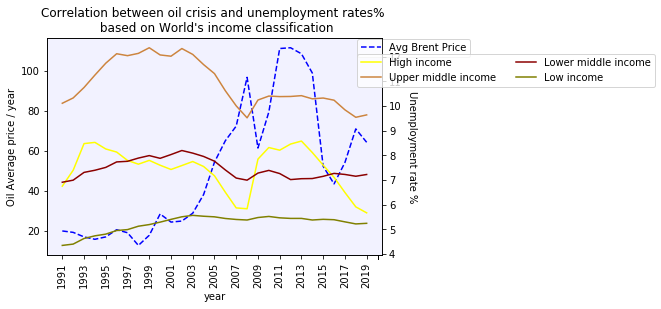

In [896]:
#plotting Data
Data;
Data_Region;
Data_Income;

#fig, ax1 to plot subplots
#label must be mentioned in the plot line so you can use legend option
fig, ax1 = plt.subplots();
ax1.plot(Data_Income['year'],Data_Income['Avg Brent Price'],'--', color ='blue',label='Avg Brent Price');
#ax1.plot(Data_Income['year'],Data_Income['Avg WTI Price'],'--', color ='teal',label='Avg WTI Price')
ax1.set_xlabel('year');
ax1.set_ylabel('Oil Average price / year');
plt.xticks(rotation = 90);
ax1.tick_params('y');
ax1.legend(loc=2, bbox_to_anchor=(0.91, 1.02),ncol=2);
#to make face color and determine its transperancy
ax1.patch.set_facecolor('blue');
ax1.patch.set_alpha(0.05);
plt.xticks(['1991', '', '1993', '', '1995', '', '1997', '', '1999',
       '', '2001', '', '2003', '', '2005', '', '2007', '',
       '2009', '', '2011', '', '2013', '', '2015', '', '2017',
       '', '2019']);
#create a new y axis with an invisible x axis
ax2 = ax1.twinx();
ax2.plot(Data_Income['year'],Data_Income['High income'], color ='yellow',label ='High income' );
ax2.plot(Data_Income['year'],Data_Income['Upper middle income'], color ='peru', label = 'Upper middle income');
ax2.plot(Data_Income['year'],Data_Income['Lower middle income'], color ='darkred', label = 'Lower middle income');
ax2.plot(Data_Income['year'],Data_Income['Low income'], color ='olive', label = 'Low income');
#label pad to change the distance from the label to axis, rotation to change the degree
#use bbox_to_anchor to determine position of legend, it cancels loc=1
#use ncol to determine if u want the legend of 2 columns or 1
ax2.set_ylabel('Unemployment rate %', labelpad = 15, rotation=270);
ax2.legend(loc=1,frameon=True, bbox_to_anchor=(1.83, .95),ncol=2);
ax2.tick_params('y');
plt.xticks(['1991', '', '1993', '', '1995', '', '1997', '', '1999',
       '', '2001', '', '2003', '', '2005', '', '2007', '',
       '2009', '', '2011', '', '2013', '', '2015', '', '2017',
       '', '2019']);
plt.title("Correlation between oil crisis and unemployment rates% \n based on World's income classification");

Text(0.5, 1.0, "Correlation between oil crisis and unemployment rates% \n based on World's regions classification")

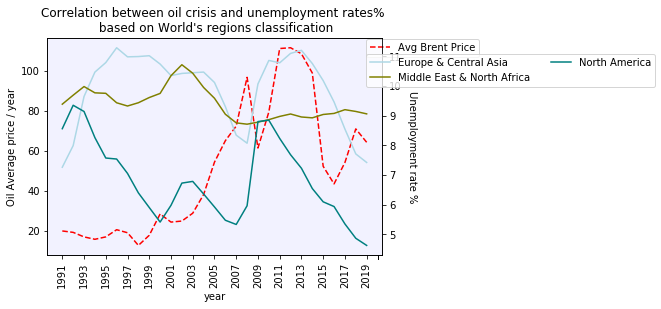

In [886]:
#plotting Data
Data;
Data_Region;
Data_Income;

#fig, ax1 to plot subplots
#label must be mentioned in the plot line so you can use legend option
fig, ax1 = plt.subplots()
ax1.plot(Data_Region['year'],Data_Region['Avg Brent Price'],'--', color ='red',label='Avg Brent Price')
#ax1.plot(Data_Region['year'],Data_Region['Avg WTI Price'],'--', color ='darkred',label='Avg WTI Price')
ax1.set_xlabel('year')
ax1.set_ylabel('Oil Average price / year')
plt.xticks(rotation = 90);
ax1.tick_params('y')
ax1.legend(loc=2, bbox_to_anchor=(0.938, 1.02),ncol=2)
#to make face color and determine its transperancy
ax1.patch.set_facecolor('blue')
ax1.patch.set_alpha(0.05)
plt.xticks(['1991', '', '1993', '', '1995', '', '1997', '', '1999',
       '', '2001', '', '2003', '', '2005', '', '2007', '',
       '2009', '', '2011', '', '2013', '', '2015', '', '2017',
       '', '2019'])
#plt.ylim([0,200])
#create a new y axis with an invisible x axis
ax2 = ax1.twinx()
ax2.plot(Data_Region['year'],Data_Region['Europe & Central Asia'], color ='lightblue', label = 'Europe & Central Asia')
#ax2.plot(Data_Region['year'],Data_Region['Latin America & Caribbean'], color ='peru', label = 'Latin America & Caribbean')
ax2.plot(Data_Region['year'],Data_Region['Middle East & North Africa'], color ='olive', label = 'Middle East & North Africa')
ax2.plot(Data_Region['year'],Data_Region['North America'], color ='teal',label ='North America' )
#use bbox_to_anchor to determine position of legend, it cancels loc=1
#use ncol to determine if u want the legend of 2 columns or 1
ax2.set_ylabel('Unemployment rate %', labelpad = 15, rotation=270)
ax2.legend(loc=1,frameon=True, bbox_to_anchor=(1.83, .95),ncol=2)
ax2.tick_params('y')
plt.xticks(['1991', '', '1993', '', '1995', '', '1997', '', '1999',
       '', '2001', '', '2003', '', '2005', '', '2007', '',
       '2009', '', '2011', '', '2013', '', '2015', '', '2017',
       '', '2019'])

plt.title("Correlation between oil crisis and unemployment rates% \n based on World's regions classification")
